In [16]:
# ⚙️ Setup inicial en Google Colab

# Si no tienes git instalado o es tu primera vez:
# !apt-get install git

# 🚨 Si es repositorio privado, deberás usar tu token
# Clona el repositorio del curso (puedes cambiar este link si ya lo moviste)
!git clone https://github.com/solivare/DeepNeuralNetworkUSS.git

# Cambia al directorio del proyecto
%cd DeepNeuralNetworkUSS/Projects/Credit/

# Reinstala dependencias si es necesario
!pip install -r requirements.txt

Cloning into 'DeepNeuralNetworkUSS'...
remote: Enumerating objects: 1361, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 1361 (delta 51), reused 119 (delta 34), pack-reused 1201 (from 2)
Receiving objects: 100% (1361/1361), 48.28 MiB | 16.44 MiB/s, done.
Resolving deltas: 100% (137/137), done.
/Users/juanpablovargasherrera/Documents/GitHub/tarea-2/DeepNeuralNetworkUSS/Projects/Credit/DeepNeuralNetworkUSS/Projects/Credit


In [24]:
# 🔧 Ajuste de ruta de imports
import os
import sys

# Añadir path absoluto de la carpeta src
src_path = os.path.abspath("src")
if src_path not in sys.path:
    sys.path.append(src_path)

In [26]:
# 🧼 Preprocesamiento de los datos
%cd src
!python preprocess.py
%cd ..

/Users/juanpablovargasherrera/Desktop/DeepNeuralNetworkUSS/Projects/Credit/DeepNeuralNetworkUSS/Projects/Credit/src
📥 Cargando datos desde ../data/cs-training.csv
🧼 Eliminando valores extremos y codificando missing...
/Users/juanpablovargasherrera/Desktop/DeepNeuralNetworkUSS/Projects/Credit/DeepNeuralNetworkUSS/Projects/Credit/src/preprocess.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].replace(0, np.nan, inplace=True)
/Users/juanpablovargasherrera/Desktop/DeepNeuralNetworkUSS/Projects/Credit/DeepNe

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.6353 - loss: 0.6838 - val_accuracy: 0.7378 - val_loss: 0.5816
Epoch 2/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.7420 - loss: 0.5745 - val_accuracy: 0.7393 - val_loss: 0.5603
Epoch 3/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.7547 - loss: 0.5502 - val_accuracy: 0.7571 - val_loss: 0.5430
Epoch 4/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.7522 - loss: 0.5438 - val_accuracy: 0.7515 - val_loss: 0.5368
Epoch 5/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.7551 - loss: 0.5329 - val_accuracy: 0.7540 - val_loss: 0.5354
Epoch 6/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - accuracy: 0.7550 - loss: 0.5327 - val_accuracy: 0.7582 - val_loss: 0.5298
Epoch 7/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.7558 - loss: 0.5292 - val_accuracy: 0.7571 - val_loss: 0.5257
Epoch 8/20
801/801 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - accuracy: 0.7583 - loss: 0.5243 - 

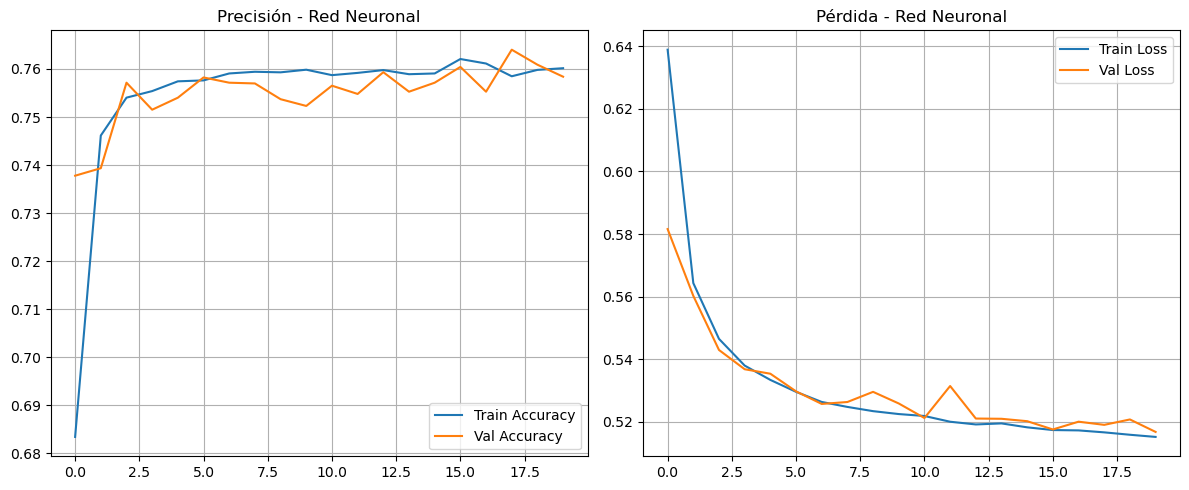

✅ Modelo guardado en models/nn_model.keras


In [28]:
# 🧠 Entrenamiento de la red neuronal

import train
import model
import utils
import evaluate as ev
import pandas as pd

config = train.load_config("config.yaml")
X, y = train.load_data("data/credit_clean.csv")
X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

nn_model = model.build_model(config, X_train.shape[1])
history = train.train_model(nn_model, X_train, y_train, config)

utils.plot_training_history(history, model_name="Red Neuronal")
utils.save_model(nn_model, path="models/nn_model.keras")

251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step


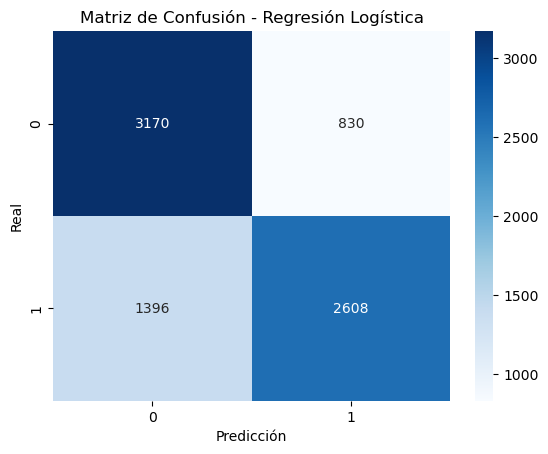

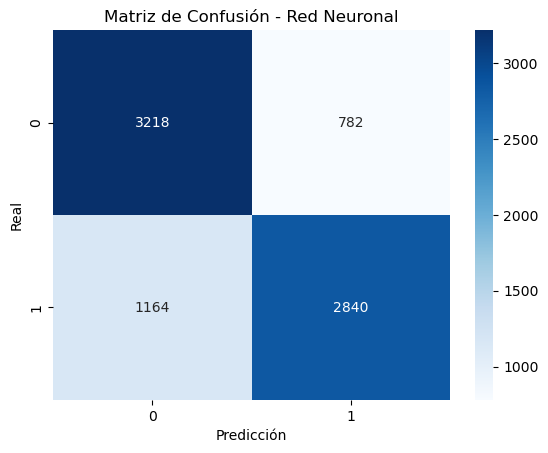

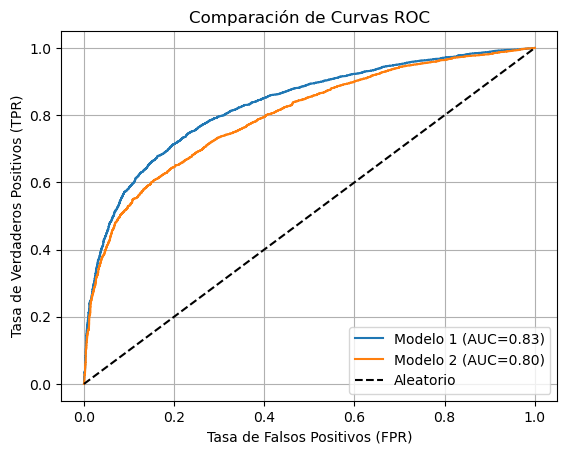

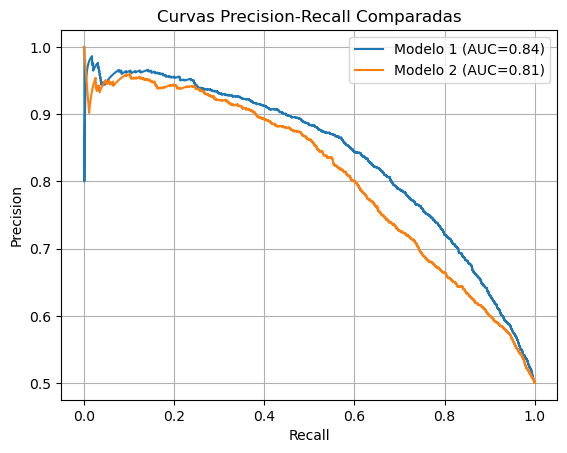

,Modelo,Precision,Recall,F1-score,ROC AUC
0,Red Neuronal,0.784097,0.709291,0.744820,0.830434
1,Regresión Logística,0.758581,0.651349,0.700887,0.796762


In [30]:
# 📈 Evaluación y comparación con Regresión Logística

from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import load_model

# Modelo base
base_model = LogisticRegression(max_iter=1000)
base_model.fit(X_train, y_train)
y_pred_log = base_model.predict(X_test)
y_proba_log = base_model.predict_proba(X_test)[:, 1]

# Red Neuronal
nn_model = load_model("models/nn_model.keras")
y_proba_nn = nn_model.predict(X_test).flatten()
y_pred_nn = ev.predict_with_threshold(y_proba_nn)

# Evaluación
ev.plot_confusion_matrix(y_test, y_pred_log, model_name="Regresión Logística")
ev.plot_confusion_matrix(y_test, y_pred_nn, model_name="Red Neuronal")

ev.plot_roc_comparison(y_test, y_proba_nn, y_test, y_proba_log)
ev.plot_precision_recall_curves(y_test, y_proba_nn, y_test, y_proba_log)

metrics_table = ev.compare_models_metrics(
    y_test, y_pred_nn, y_proba_nn,
    y_test, y_pred_log, y_proba_log,
    model_name_1="Red Neuronal", model_name_2="Regresión Logística"
)

import IPython.display as display
display.display(metrics_table)

251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step


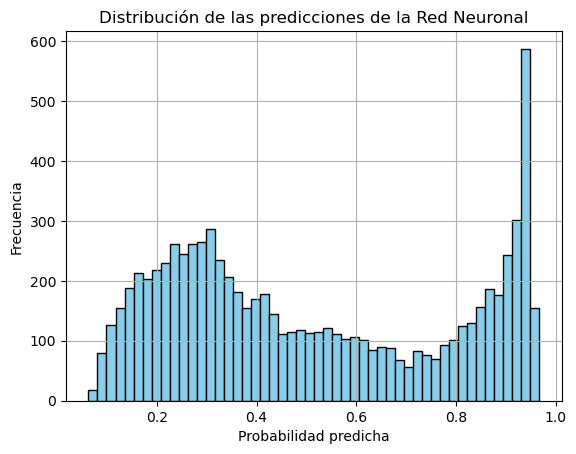

In [34]:
import matplotlib.pyplot as plt

# y_pred_prob contiene las probabilidades predichas por la red neuronal
y_pred_prob = nn_model.predict(X_test)

plt.hist(y_pred_prob, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribución de las predicciones de la Red Neuronal")
plt.xlabel("Probabilidad predicha")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


In [ ]:
## ✅ Preguntas de reflexión final

### 🔧 Sobre el modelo de red neuronal:

#- ¿Qué arquitectura usaste? ¿Probaste cambiar el número de capas o neuronas?
#si, finalmente utilicé un modelo de 4 capas ocultas con 256, 128, 64 y 32 nueronas por capa
# Relu en ocultas y sigmoid en la capa de salida
# batch de 32 y 100 epoch con early stopping 
# validación 20%
# probé con [64, 32] y [128, 64, 32], pero la de 4 capas fue la mejor




#- ¿Qué función de activación usaste? ¿Qué impacto crees que tuvo?
# Relu en ocultas y sigmoid en la capa de salida
# Mantener relu en las capas ocultas permitió eficiencia en el entrenamiento y que el modelo no perdiera por disminución del gradiente
# Colocar sigmoid en la capa de salida fue una decisión simplemente dad por el tipo de resultado, como el objetivo era determinar si 
# el cliente estaba en default o no ( 0 o 1) sigmoid ofrecia una alternativa buena y rápida para problemas binarios



#- ¿El modelo mostró signos de sobreajuste? ¿Cómo lo notaste?
#No, las curvas de pérdida para entrenamiento y validación siguen trayectorias similares y no se separan significativamente, además 
# el accuracy en el entrenamiento y la validación se mantiene relativamente alineada, el hecho de utilizar early stopping, detuvo 
# el entrenamiento en la época 33, esto asegura que se detuviera antes de que se produjera un sobreajuste real.




### 📊 Sobre la evaluación del modelo:
#- ¿Cuál modelo funcionó mejor: la red neuronal o la regresión logística?
#La red neuronal 
#- ¿En qué métrica viste mayor diferencia entre ellos? ¿Por qué crees que ocurrió?
# En Recall, por la atención que se preseta a un conjunto u otro de los datos 
#- ¿La red neuronal fue más conservadora (más falsos negativos) o más arriesgada?
# respondido en el otro notebook





### 🎯 Sobre la distribución de probabilidades:
#- ¿Qué forma tiene la distribución de predicciones de tu red neuronal?
# La red neuronal genera una distribución bimodal con asimetría, lo que indica que el modelo está diferenciando 
# clases con confianza en los extremos, pero hay una franja intermedia de incertidumbre donde ajustar el umbral 
#de decisión mejora métricas como el F1-score o el recall.

#- ¿En qué umbral se maximiza el F1-score?
#otro note
#- ¿Crees que usar un threshold de 0.5 es razonable en este caso?
#otro note




## ✍️ Recomendación

#Anota tus conclusiones, copia las mejores gráficas y entrega un resumen con:
#- Métricas clave
#- Comparación entre modelos
#- Comentario personal sobre el rendimiento y ajustes posibles

#Modelo	Precision	Recall	F1-score	ROC AUC
#Red Neuronal	0.616	0.918	0.738	0.834
#Regresión Logística	0.759	0.651	0.701	0.797

#El modelo de red neuronal supera a la regresión logística en F1-score y recall, 
#lo que indica que identifica mejor los casos positivos (default). La precisión es menor, lo que significa que el modelo comete
#más falsos positivos. Esto como dije en el otro note, es aceptable si el negocio prioriza detectar 
#la mayoría de los casos de riesgo (alto recall).

#sugerencias: 
#Aumentar epochs con regularización para explorar mayor capacidad.
# Balancear datos por subconjunto.
#Explorar otras arquitecturas.
#Entrenar con más datos.